<a href="https://colab.research.google.com/github/sahinebrar/MachineLearningExercises/blob/main/memorydump_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

from random import randint
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Doktora/MakinaOgrenmesi/MalMem.csv")

'''for index in range(0, len(df)):
  if df.loc[index, "Category"] == "Benign": 
    continue
  temp = df.loc[index, "Category"].split("-")
  df.loc[index, "Category"] =  " ".join([temp[0], "-", temp[1]])

# writing into the file
df.to_csv("MalMem.csv", index=False)'''

'for index in range(0, len(df)):\n  if df.loc[index, "Category"] == "Benign": \n    continue\n  temp = df.loc[index, "Category"].split("-")\n  df.loc[index, "Category"] =  " ".join([temp[0], "-", temp[1]])\n\n# writing into the file\ndf.to_csv("MalMem.csv", index=False)'

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [5]:
print(df.describe())

       pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              3

In [6]:
print(df.isna().sum()) # no missing data

Category                                  0
pslist.nproc                              0
pslist.nppid                              0
pslist.avg_threads                        0
pslist.nprocs64bit                        0
pslist.avg_handlers                       0
dlllist.ndlls                             0
dlllist.avg_dlls_per_proc                 0
handles.nhandles                          0
handles.avg_handles_per_proc              0
handles.nport                             0
handles.nfile                             0
handles.nevent                            0
handles.ndesktop                          0
handles.nkey                              0
handles.nthread                           0
handles.ndirectory                        0
handles.nsemaphore                        0
handles.ntimer                            0
handles.nsection                          0
handles.nmutant                           0
ldrmodules.not_in_load                    0
ldrmodules.not_in_init          

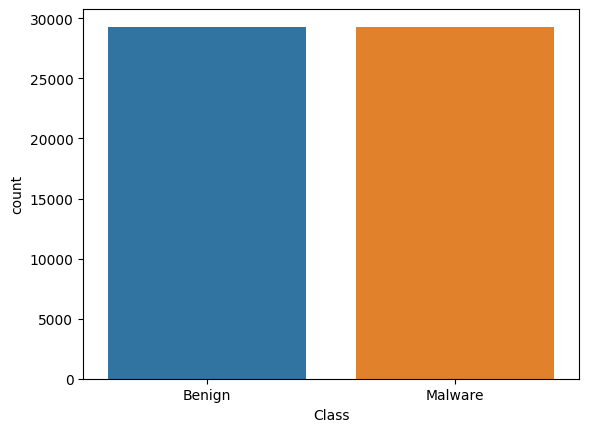

In [7]:
lab=LabelEncoder()
df['category']=lab.fit_transform(df['Category'])
df['class']=lab.fit_transform(df['Class'])
sn.countplot(x = 'Class', data= df)
plt.show()

In [8]:
label_mapping = dict(zip(df['category'], df['Category']))
label_mapping

{0: 'Benign',
 1: 'Ransomware - Ako',
 2: 'Ransomware - Conti',
 3: 'Ransomware - Maze',
 4: 'Ransomware - Pysa',
 5: 'Ransomware - Shade',
 6: 'Spyware - 180solutions',
 7: 'Spyware - CWS',
 8: 'Spyware - Gator',
 9: 'Spyware - TIBS',
 10: 'Spyware - Transponder',
 11: 'Trojan - Emotet',
 12: 'Trojan - Reconyc',
 13: 'Trojan - Refroso',
 14: 'Trojan - Scar',
 15: 'Trojan - Zeus'}

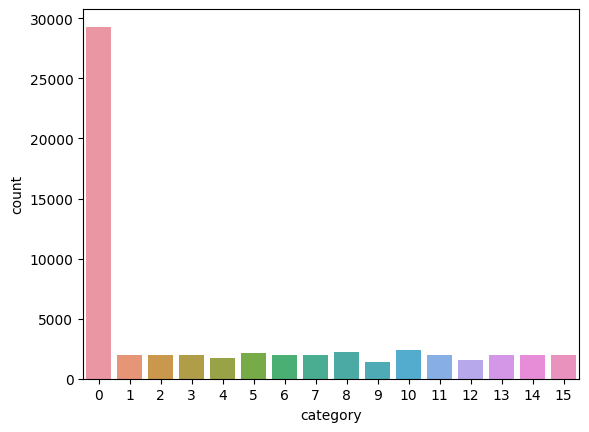

In [9]:
sn.countplot(x = 'category', data= df)
plt.show()

In [10]:
# split traing & test 
x = df[['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.nprocs64bit', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nport', 'handles.nfile',
       'handles.nevent', 'handles.ndesktop', 'handles.nkey', 'handles.nthread',
       'handles.ndirectory', 'handles.nsemaphore', 'handles.ntimer',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'ldrmodules.not_in_mem',
       'ldrmodules.not_in_load_avg', 'ldrmodules.not_in_init_avg',
       'ldrmodules.not_in_mem_avg', 'malfind.ninjections',
       'malfind.commitCharge', 'malfind.protection',
       'malfind.uniqueInjections', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles',
       'psxview.not_in_session', 'psxview.not_in_deskthrd',
       'psxview.not_in_pslist_false_avg',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_pspcid_list_false_avg',
       'psxview.not_in_csrss_handles_false_avg',
       'psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd_false_avg',
       'modules.nmodules', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.fs_drivers', 'svcscan.process_services',
       'svcscan.shared_process_services',
       'svcscan.interactive_process_services', 'svcscan.nactive',
       'callbacks.ncallbacks', 'callbacks.nanonymous', 'callbacks.ngeneric']]
y = df[['category']]
x_train,x_test,y_train,y_test=train_test_split(x,y)
#smote = SMOTE(random_state=42)
#x_train, y_train = smote.fit_resample(x_train, y_train)
print(y_test.shape)

(14649, 1)


In [11]:
standardscaler = StandardScaler()
x_train_standardscaler = standardscaler.fit_transform(x_train)
x_test_standardscaler = standardscaler.transform(x_test)

In [23]:
# Random Forest Classifier (Library)

#rf=RandomForestClassifier(n_estimators=278, oob_score = True, max_features=30)#
rf=RandomForestClassifier(n_estimators=278, min_samples_split=5, min_samples_leaf=2, max_features='auto', max_depth=4, bootstrap= True)
history = rf.fit(x_train_standardscaler, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [24]:
# Random Forest Classifier (Library) Test
prediction = rf.predict(x_test_standardscaler)

In [25]:
acc_randomforest = accuracy_score(y_test, prediction)
print(acc_randomforest)

0.6004505426991603


In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 201, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

rf_Model = RandomForestClassifier()

rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)
rf_RandomGrid.fit(x_train_standardscaler, y_train.values.ravel())

'''rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_standardscaler, y_train.values.ravel())
print(rf_random.best_params_)'''

{'n_estimators': [201, 212, 223, 234, 245, 256, 267, 278, 289, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


'rf = RandomForestClassifier()\nrf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)\nrf_random.fit(x_train_standardscaler, y_train.values.ravel())\nprint(rf_random.best_params_)'

In [22]:
print(rf_RandomGrid.best_params_)
print (f'Train Accuracy - : {rf_RandomGrid.score(x_train_standardscaler,y_train.values.ravel()):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(x_test_standardscaler,y_test):.3f}')

{'n_estimators': 278, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}
Train Accuracy - : 0.595
Test Accuracy - : 0.602


In [32]:
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=200, oob_score = True, max_features=30)

# Perform cross-validation
cv_scores = cross_val_score(random_forest, x_train_standardscaler, y_train.values.ravel(), cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.75324232 0.75870307 0.75935829 0.7598134  0.75537604]
Mean cross-validation score: 0.7572986245217319


In [ ]:
'''for index in range(21,50):
  classifier= RandomForestClassifier(n_estimators=200,oob_score = True, max_features=index )  
  classifier.fit(x_train_standardscaler, y_train.values.ravel())  
  prediction = rf.predict(x_test_standardscaler)
  acc_standardscaler = accuracy_score(y_test, prediction)
  print("max_feature: ", index, " Accuracy: ", acc_standardscaler)
  
  
  model_random = RandomForestClassifier(max_depth=6,
                                      max_features='auto',
                                      max_leaf_nodes=6,
                                      n_estimators=50)
  model_random.fit(x_train_standardscaler, y_train.values.ravel())
  y_pred_rand = model_random.predict(x_test_standardscaler)
  acc_RandomizedSearchCV = accuracy_score(y_test, y_pred_rand)
  print(acc_RandomizedSearchCV)
  '''

max_feature:  21  Accuracy:  0.7613488975356679
max_feature:  22  Accuracy:  0.7613488975356679


KeyboardInterrupt: ignored

In [34]:
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
smote = SMOTE(random_state=42)

classifier = GaussianNB()
pipeline = Pipeline([('smote', smote), ('classifier', classifier)])

param_grid = {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(x_train_standardscaler, y_train.values.ravel())

best_classifier = grid_search.best_estimator_

y_pred = best_classifier.predict(x_test_standardscaler)
acc_GaussianNB = accuracy_score(y_test, y_pred)
print(acc_GaussianNB)

0.5741688852481398


In [36]:
print(grid_search.best_estimator_)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier', GaussianNB(var_smoothing=1e-07))])


In [37]:
classifier_cross = GaussianNB(var_smoothing=1e-07)
cv_scores = cross_val_score(classifier, x_train_standardscaler, y_train.values.ravel(), cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.56393629 0.56564278 0.56422801 0.56434179 0.56422801]
Mean cross-validation score: 0.5644753765145722
